In [1]:
%pwd
%cd ..

/media/yana/discD/projects/farich-pics


In [2]:
from farichlib.DataPreprocessing import DataPreprocessing

In [3]:
dp = DataPreprocessing('../farich-pics-mine/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root')

In [4]:
X, y = dp.get_images()

In [6]:
board, Y_res = dp.generate_board(board_size=1000, N_circles=100, noise_level=1)

0


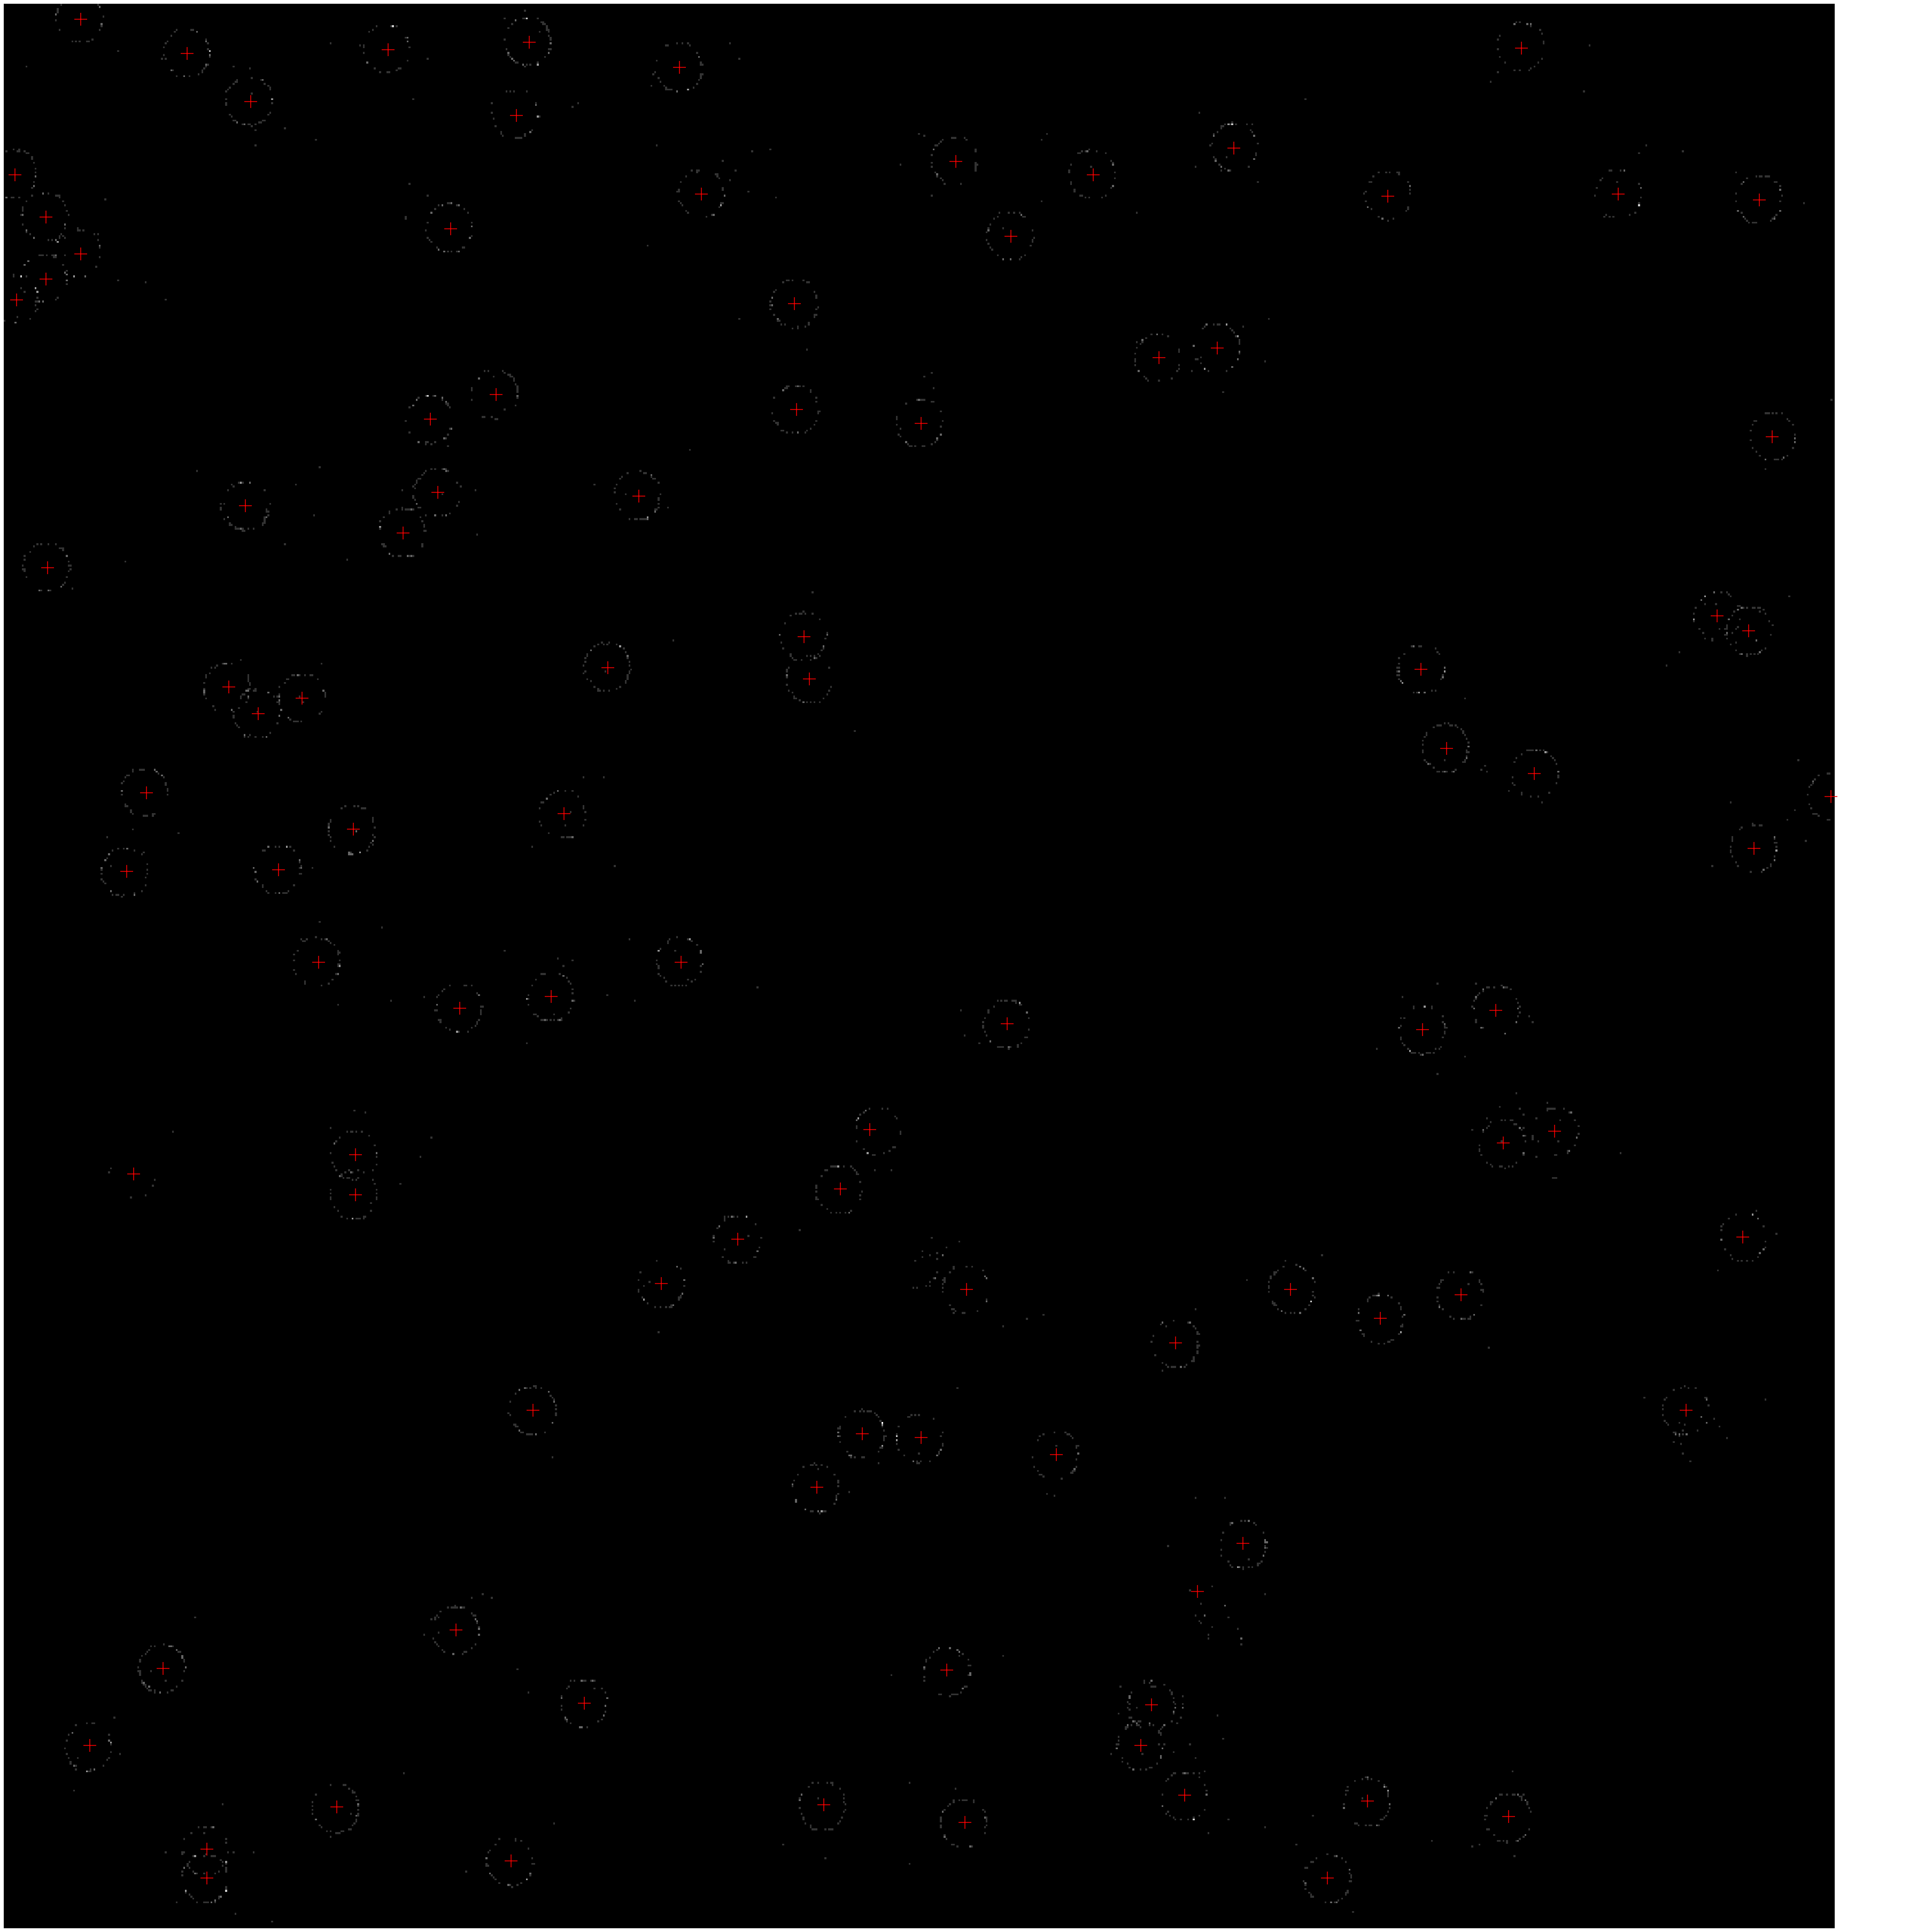

In [9]:
import numpy as np
import matplotlib.pyplot as plt
xedges = np.linspace(0,1000,1000)
yedges = np.linspace(0,1000,1000)

fig = plt.figure(frameon=False, figsize=(50, 50) )
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, board, cmap='gray')
Y_res = np.reshape(Y_res, (-1,3))
plt.scatter(Y_res[:,0], Y_res[:,1], marker='+', s=550, c='red') #mean vertex